In [ ]:
!wget --no-check-certificate \
  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
  -O /tmp/cats_and_dogs_filtered.zip

In [1]:
import os
import zipfile

In [7]:
os.listdir('data/train/cats')

['cat.1.jpg',
 'cat.10.jpg',
 'cat.100.jpg',
 'cat.1000.jpg',
 'cat.1001.jpg',
 'cat.1002.jpg',
 'cat.1003.jpg',
 'cat.1004.jpg',
 'cat.1005.jpg',
 'cat.1006.jpg',
 'cat.1007.jpg',
 'cat.1008.jpg',
 'cat.1009.jpg',
 'cat.101.jpg',
 'cat.1010.jpg',
 'cat.1011.jpg',
 'cat.1012.jpg',
 'cat.1013.jpg',
 'cat.1014.jpg',
 'cat.1015.jpg',
 'cat.1016.jpg',
 'cat.1017.jpg',
 'cat.1018.jpg',
 'cat.1019.jpg',
 'cat.102.jpg',
 'cat.1020.jpg',
 'cat.1021.jpg',
 'cat.1022.jpg',
 'cat.1023.jpg',
 'cat.1024.jpg',
 'cat.1025.jpg',
 'cat.1026.jpg',
 'cat.1027.jpg',
 'cat.1028.jpg',
 'cat.1029.jpg',
 'cat.103.jpg',
 'cat.1030.jpg',
 'cat.1031.jpg',
 'cat.1032.jpg',
 'cat.1033.jpg',
 'cat.1034.jpg',
 'cat.1035.jpg',
 'cat.1036.jpg',
 'cat.1037.jpg',
 'cat.1038.jpg',
 'cat.1039.jpg',
 'cat.104.jpg',
 'cat.1040.jpg',
 'cat.1041.jpg',
 'cat.1042.jpg',
 'cat.1043.jpg',
 'cat.1044.jpg',
 'cat.1045.jpg',
 'cat.1046.jpg',
 'cat.1047.jpg',
 'cat.1048.jpg',
 'cat.1049.jpg',
 'cat.105.jpg',
 'cat.1050.jpg',
 'cat.10

In [8]:
base_dir = 'data/'
train_dir = os.path.join(base_dir, 'train/')
validation_dir = os.path.join(base_dir, 'validation/')
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [9]:
train_cat_fnames = os.listdir(train_cats_dir)
train_dog_fnames = os.listdir(train_dogs_dir)
print(train_cat_fnames[:10])
print(train_dog_fnames[:10])

['cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.1000.jpg', 'cat.1001.jpg', 'cat.1002.jpg', 'cat.1003.jpg', 'cat.1004.jpg', 'cat.1005.jpg', 'cat.1006.jpg']
['dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.1000.jpg', 'dog.1001.jpg', 'dog.1002.jpg', 'dog.1003.jpg', 'dog.1004.jpg', 'dog.1005.jpg', 'dog.1006.jpg']


In [10]:
print('The total training cat images:', len(os.listdir(train_cats_dir)))
print('The total training dog images:', len(os.listdir(train_dogs_dir)))
print('The total validation cat images:', len(os.listdir(validation_cats_dir)))
print('The total validation dog images:', len(os.listdir(validation_dogs_dir)))

The total training cat images: 4001
The total training dog images: 4006
The total validation cat images: 1012
The total validation dog images: 1013


In [11]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [12]:
nrows = 4
ncols = 4
pic_index = 0

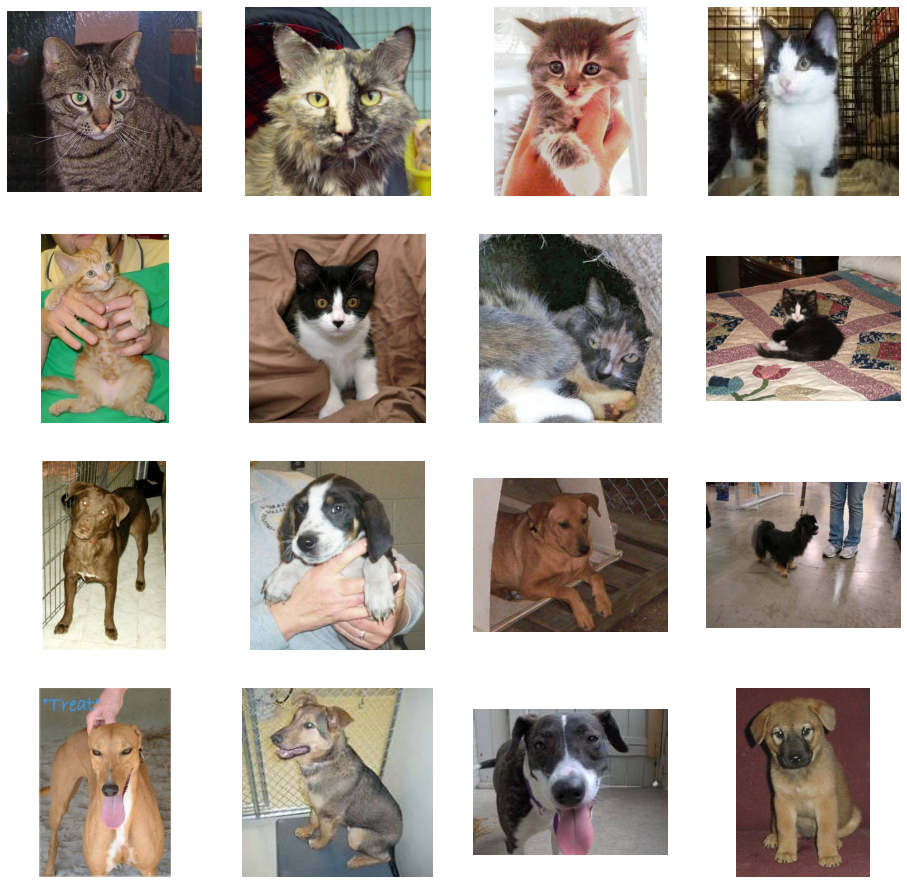

In [13]:
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)
pic_index += 8
next_cat_pic = [os.path.join(train_cats_dir, fname) for fname in train_cat_fnames[pic_index-8:pic_index]]
next_dog_pic = [os.path.join(train_dogs_dir, fname) for fname in train_dog_fnames[pic_index-8:pic_index]]
for i, img_path in enumerate(next_cat_pic+next_dog_pic):
  s = plt.subplot(nrows, ncols, i+1)
  s.axis('Off')
  img = mpimg.imread(img_path)
  plt.imshow(img)
plt.show()

In [14]:
# Building The Model

In [15]:
import tensorflow as tf
from tensorflow import keras

In [16]:
model = keras.models.Sequential([
        keras.layers.Conv2D(16, (3, 3), activation = 'relu', input_shape = (150, 150, 3)),
        keras.layers.MaxPooling2D(2, 2),
        keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
        keras.layers.MaxPooling2D(2, 2),
        keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
        keras.layers.MaxPooling2D(2, 2),
        keras.layers.Flatten(),
        keras.layers.Dense(512, activation = 'relu'),
        keras.layers.Dense(1, activation = 'sigmoid'),
])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

In [18]:
from tensorflow.keras.optimizers import RMSprop

In [19]:
model.compile(optimizer = RMSprop(lr = 0.001),
              loss = 'binary_crossentropy',
              metrics = ['accuracy'],
              )

In [20]:
# Setting up the DataGenerators

In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [22]:
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    batch_size = 20,
    class_mode = 'binary',
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (150, 150),
    batch_size = 20,
    class_mode = 'binary',
)

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


In [23]:
history = model.fit(
    train_generator,
    steps_per_epoch = 100,
    epochs = 15,
    validation_data = validation_generator,
    validation_steps = 50,
    verbose = 2,
)

Epoch 1/15
100/100 - 28s - loss: 0.8266 - accuracy: 0.5390 - val_loss: 0.6629 - val_accuracy: 0.6090
Epoch 2/15
100/100 - 27s - loss: 0.6653 - accuracy: 0.6165 - val_loss: 0.5856 - val_accuracy: 0.6880
Epoch 3/15
100/100 - 25s - loss: 0.6093 - accuracy: 0.6690 - val_loss: 0.5759 - val_accuracy: 0.6940
Epoch 4/15
100/100 - 25s - loss: 0.5756 - accuracy: 0.6982 - val_loss: 0.5764 - val_accuracy: 0.7060
Epoch 5/15
100/100 - 25s - loss: 0.5501 - accuracy: 0.7250 - val_loss: 0.5375 - val_accuracy: 0.7390
Epoch 6/15
100/100 - 25s - loss: 0.5367 - accuracy: 0.7435 - val_loss: 0.6510 - val_accuracy: 0.6950
Epoch 7/15
100/100 - 24s - loss: 0.4821 - accuracy: 0.7683 - val_loss: 0.5341 - val_accuracy: 0.7510
Epoch 8/15
100/100 - 25s - loss: 0.4840 - accuracy: 0.7610 - val_loss: 0.5606 - val_accuracy: 0.7610
Epoch 9/15
100/100 - 25s - loss: 0.4632 - accuracy: 0.7855 - val_loss: 0.5023 - val_accuracy: 0.7700
Epoch 10/15
100/100 - 26s - loss: 0.4310 - accuracy: 0.8045 - val_loss: 0.5381 - val_accura

In [24]:
# Evaluating The Model

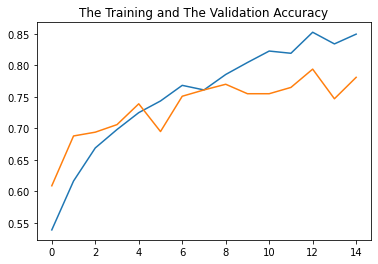

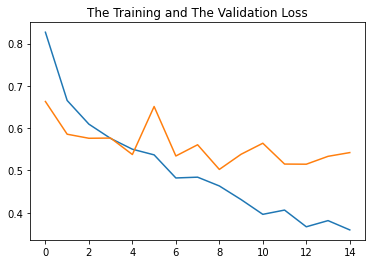

In [25]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('The Training and The Validation Accuracy')
plt.figure()

plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('The Training and The Validation Loss')
plt.show()

As we can see this model is overfitting to the training data. To solve this problem, we can use the data/image augmentation techniques like rotating the image by an angle or moving the object around the image, zooming in and out of the image.

In [26]:
train_datagen_aug = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

validation_datagen_aug = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

train_generator_aug = train_datagen_aug.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    batch_size = 20,
    class_mode = 'binary',
)

validation_generator_aug = validation_datagen_aug.flow_from_directory(
    validation_dir,
    target_size = (150, 150),
    batch_size = 20,
    class_mode = 'binary',
)

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


In [ ]:
history_aug = model.fit(
    train_generator_aug,
    steps_per_epoch = 100,
    epochs = 15,
    validation_data = validation_generator_aug,
    validation_steps = 50,
    verbose = 2,
)

Epoch 1/15
100/100 - 75s - loss: 0.6235 - accuracy: 0.6665 - val_loss: 0.5709 - val_accuracy: 0.7040
Epoch 2/15
100/100 - 113s - loss: 0.5793 - accuracy: 0.7040 - val_loss: 0.6116 - val_accuracy: 0.6930
Epoch 3/15
100/100 - 88s - loss: 0.5787 - accuracy: 0.7130 - val_loss: 0.6863 - val_accuracy: 0.6510
Epoch 4/15
100/100 - 77s - loss: 0.5864 - accuracy: 0.7018 - val_loss: 0.5683 - val_accuracy: 0.6910
Epoch 5/15


Now we will plot the graph.

In [ ]:
acc = history_aug.history['accuracy']
validation_acc = history_aug.history['val_accuracy']
loss = history_aug.history['loss']
validation_loss = history_aug.history['val_loss']

epochs = range(len(acc))
plt.plot(epochs, acc, 'bo', label="Training Accuracy")
plt.plot(epochs, validation_acc, 'b', label="Validation Accuracy")
plt.title("Training Vs Validation Accuracy")
plt.figure()
plt.plot(epochs, loss, 'bo', label="Training Loss")
plt.plot(epochs, validation_loss, 'b', label="Validation Loss")
plt.title("Training Vs Validation Loss")
plt.show()

This fixes the overfitting problem to some extent.

In [ ]:
# Now implementing Transfer Learning

In [ ]:
import os
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

In [ ]:
local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

In [ ]:
pre_trained_model = InceptionV3(input_shape = (150, 150, 3), include_top = False, weights = None)
pre_trained_model.load_weights(local_weights_file)
for layer in pre_trained_model.layers:
  layer.trainable = False

In [ ]:
pre_trained_model.summary()

In [ ]:
last_layer = pre_trained_model.get_layer('mixed7')
last_output = last_layer.output

In [ ]:
from tensorflow.keras.optimizers import RMSprop

In [ ]:
x = layers.Flatten()(last_output)
x = layers.Dense(1024, activation = 'relu')(x)
x = layers.Dense(1, activation = 'sigmoid')(x)

In [ ]:
model = Model(pre_trained_model.input, x)
model.compile(
    optimizer = RMSprop(lr = 0.001),
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

In [ ]:
history_transfer = model.fit_generator(
    train_generator_aug,
    validation_data = validation_generator_aug,
    steps_per_epoch = 100,
    epochs = 20,
    validation_steps = 50,
    verbose = 2,
)

In [ ]:
# Now we will plot the graphs

In [ ]:
acc = history_transfer.history['accuracy']
validation_acc = history_transfer.history['val_accuracy']
loss = history_transfer.history['loss']
validation_loss = history_transfer.history['val_loss']

epochs = range(len(acc))
plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, validation_acc, 'b', label='Validation Accuracy')
plt.title('Training Vs Validation Accuracy')
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, validation_loss, 'b', label='Validation Loss')
plt.title("Training Vs Validation Loss")
plt.show()